# Avocado prediction

Problem description: 

Our client, Avocado King, is an avocado supplier that sells conventional and organic avocados all over the U.S. The client has given you historical data on the avocado prices/sales in the US market and they want to know how they could use this data and predictive models to gain a competitive edge. They are particularly interested in predicting the prices of avocados and the number of avocados sold.

Importing libraries

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RandomizedSearchCV

Reading price/sales data and google search data

In [306]:
df1 = pd.read_csv('price-and-sales-data.csv')
df2 = pd.read_csv('google-data.csv')

In [308]:
df1

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
2,2015-01-04,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,BaltimoreWashington
3,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise
4,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston
5,2015-01-04,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.00,conventional,2015,BuffaloRochester
6,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California
7,2015-01-04,1.19,166006.29,29419.03,47220.75,38568.95,50797.56,NaN,NaN,0.00,conventional,2015,Charlotte
8,2015-01-04,1.11,783068.03,30270.26,550752.19,124506.10,77539.48,72888.46,4651.02,0.00,conventional,2015,Chicago
9,2015-01-04,0.88,228569.58,3274.30,168764.78,1447.06,NaN,17525.31,37445.46,112.67,conventional,2015,CincinnatiDayton


In [198]:
df2.head()

,Week,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,2015-01-04,46,76,84,8,51,10
1,2015-01-11,48,79,76,8,38,29
2,2015-01-18,48,82,84,9,66,27
3,2015-01-25,49,82,89,8,44,28
4,2015-02-01,52,81,82,7,46,42


In [199]:
unqReg  = df1['region'].unique()
print('number of regions:',len(unqReg))

number of regions: 54


In [200]:
unqYEAR = df1['year'].unique()
print('year:',unqYEAR,'number of years:',len(unqYEAR))

year: [2015 2016 2017 2018 2019] number of years: 5


In [201]:
unqAVC  = df1['type'].unique()
print('avocado types:',unqAVC,'number of avocado types:',len(unqAVC))

avocado types: ['conventional' 'organic'] number of avocado types: 2


Get some statistics: average price, standard deviation, min/max and quantiles. 

In [202]:
df1.describe()

,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,24259.000000,2.421200e+04,2.426100e+04,2.425500e+04,2.424500e+04,2.427100e+04,2.422700e+04,2.421400e+04,24293.000000,25161.000000
mean,1.396018,9.170913e+05,2.981530e+05,2.958284e+05,2.246362e+04,2.950432e+05,2.124199e+05,7.589924e+04,4405.638467,2016.776877
std,0.384476,3.731937e+06,1.288583e+06,1.209445e+06,1.046621e+05,1.232967e+06,8.693043e+05,3.586079e+05,25806.499886,1.323978
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.323404e+04,8.225900e+02,3.061135e+03,0.000000e+00,7.319505e+03,4.770445e+03,2.358200e+02,0.000000,2016.000000
50%,1.360000,1.190528e+05,9.855110e+03,2.697755e+04,1.937600e+02,4.625771e+04,3.133734e+04,4.043680e+03,0.000000,2017.000000
75%,1.640000,4.733783e+05,1.141219e+05,1.498719e+05,6.078170e+03,1.394295e+05,1.008827e+05,3.050337e+04,313.890000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,7.864297e+06,844929.830000,2019.000000


In [203]:
df2.describe()

,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,52.309623,82.497908,66.991632,32.711297,50.179916,36.062762
std,11.291978,6.845764,14.840890,19.542141,12.261723,12.702157
min,29.000000,56.000000,33.000000,7.000000,15.000000,10.000000
25%,44.500000,79.000000,55.000000,15.000000,42.000000,27.000000
50%,52.000000,83.000000,68.000000,30.000000,50.000000,35.000000
75%,60.000000,87.000000,78.500000,50.500000,59.000000,44.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## Preprocessing

1. Removing/filling NaN
2. converting date to numeric
3. converting region to numeric 

In [204]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Date'] = df1['Date'].dt.week
df1.rename(columns={'Date': 'Week'}, inplace=True)

In [205]:
df1.head()

,Week,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
2,1,NaN,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,BaltimoreWashington
3,1,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
4,1,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston


In [206]:
# Converting to week to get numerical value
df2['Week'] = pd.to_datetime(df2['Week'])
df2['year'] = df2['Week'].dt.year
df2['Week'] = df2['Week'].dt.week

In [207]:
df2.head()

,Week,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States),year
0,1,46,76,84,8,51,10,2015
1,2,48,79,76,8,38,29,2015
2,3,48,82,84,9,66,27,2015
3,4,49,82,89,8,44,28,2015
4,5,52,81,82,7,46,42,2015


In [208]:
# Merge dataframes on week
df = pd.merge(df1, df2, how='left', left_on=['Week','year'],right_on=['Week','year'])

Check for NaN values

In [209]:
df.isnull().sum()

Week                                   0
AveragePrice                         913
TotalVolume                          958
4046                                 911
4225                                 919
4770                                 928
TotalBags                            903
SmallBags                            944
LargeBags                            952
XLargeBags                           881
type                                   0
year                                   0
region                                 0
avocado: (United States)               0
organic: (United States)               0
avocado recipe: (United States)        0
avocado toast: (United States)         0
avocado sandwich: (United States)      0
organic avocado: (United States)       0
dtype: int64

In [210]:
(df == 0.0).sum(axis=0) 

Week                                     0
AveragePrice                             0
TotalVolume                              0
4046                                   321
4225                                   116
4770                                  7611
TotalBags                               14
SmallBags                              150
LargeBags                             2744
XLargeBags                           15093
type                                     0
year                                     0
region                                   0
avocado: (United States)                 0
organic: (United States)                 0
avocado recipe: (United States)          0
avocado toast: (United States)           0
avocado sandwich: (United States)        0
organic avocado: (United States)         0
dtype: int64

Need to fill/drop NaN values. I will fill these values with the mean of the value from all regions.

In [211]:
#df_fill = df.copy()
#filnan = list(df.columns)

#for i in filnan[1:10]:
#    df_fill[i] = df_fill[i].fillna(df_fill[i].mean())

df_fill = df.copy()
df_fill.dropna(inplace=True)

In [212]:
df_fill.isnull().sum()

Week                                 0
AveragePrice                         0
TotalVolume                          0
4046                                 0
4225                                 0
4770                                 0
TotalBags                            0
SmallBags                            0
LargeBags                            0
XLargeBags                           0
type                                 0
year                                 0
region                               0
avocado: (United States)             0
organic: (United States)             0
avocado recipe: (United States)      0
avocado toast: (United States)       0
avocado sandwich: (United States)    0
organic avocado: (United States)     0
dtype: int64

In [213]:
df_fill.head()

,Week,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,1,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,46,76,84,8,51,10
1,1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,46,76,84,8,51,10
3,1,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise,46,76,84,8,51,10
4,1,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston,46,76,84,8,51,10
5,1,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.0,conventional,2015,BuffaloRochester,46,76,84,8,51,10


In [214]:
le = preprocessing.LabelEncoder()
df_fill['type'] = le.fit_transform(df_fill['type'])
df_fill['region'] = le.fit_transform(df_fill['region'])
#df_fill = pd.get_dummies(df_fill,drop_first=True)
#df_fill.drop('region', axis=1, inplace=True)
df_fill.head()

,Week,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,1,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,0,46,76,84,8,51,10
1,1,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,1,46,76,84,8,51,10
3,1,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,2015,3,46,76,84,8,51,10
4,1,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,2015,4,46,76,84,8,51,10
5,1,1.40,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.0,0,2015,5,46,76,84,8,51,10


# Total volume prediction

1. Analysing features and check for their importance
2. Modeling using Lasso for sparse feature selection
3. Modeling using Gradientboosting trees

In [215]:
# Average price prediction comes after total volume, so this feature is also dropped
# Dropping other volumes (linear combination of the total volume)

df_tot   = df_fill.copy()
df_tot.drop(df_tot.columns[[1,3,4,5,6,7,8,9]],axis=1,inplace=True)

In [216]:
df_tot.head()

,Week,TotalVolume,type,year,region,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
0,1,40873.28,0,2015,0,46,76,84,8,51,10
1,1,435021.49,0,2015,1,46,76,84,8,51,10
3,1,80034.32,0,2015,3,46,76,84,8,51,10
4,1,491738.00,0,2015,4,46,76,84,8,51,10
5,1,116253.44,0,2015,5,46,76,84,8,51,10


In [217]:
# 2019 data as the test data

df_avg   = df_fill.copy()

# creating data for training
df_train = df_tot[df_tot['year']!=2019]
df_test  = df_tot[df_tot['year']==2019]

X_train = df_train.iloc[:,[0]+[int(x) for x in range(2,len(df_train.iloc[0,:]))]] 
y_train = df_train.iloc[:,1]

X_test = df_test.iloc[:,[0]+[int(x) for x in range(2,len(df_test.iloc[0,:]))]] 
y_test = df_test.iloc[:,1]

In [218]:
X_train['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

## Check for feature importance using ExtraTreesRegressor

In [219]:
ex_model = ExtraTreesRegressor()

In [220]:
ex_model.fit(X_train,y_train)

C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

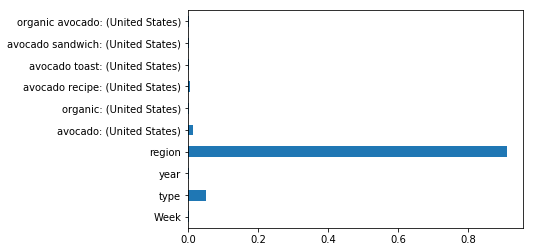

In [221]:
feature_imp = pd.Series(ex_model.feature_importances_,index=X_train.columns)
feature_imp.plot(kind='barh')
plt.show()

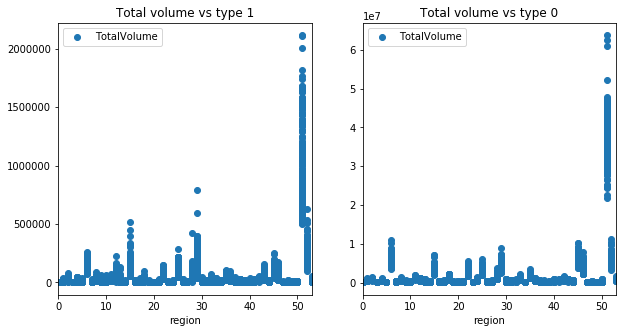

In [222]:
figure, axes = plt.subplots(1, 2)
df_train[df_train['type']==1].plot(x='region', y='TotalVolume', style='o',ax=axes[0],figsize=(10,5),title='Total volume vs type 1')
df_train[df_train['type']==0].plot(x='region', y='TotalVolume', style='o',ax=axes[1],figsize=(10,5),title='Total volume vs type 0')

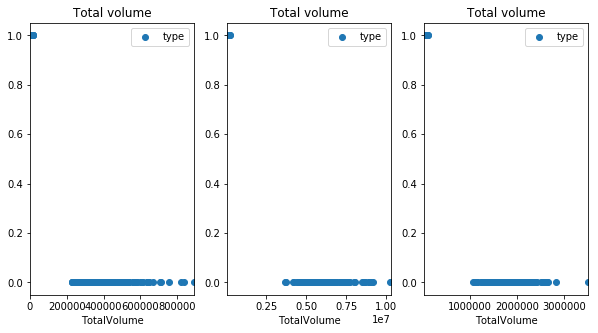

In [223]:
figure, axes = plt.subplots(1, 3)
df_train[df_train['region']==50].plot(x='TotalVolume', y='type', style='o',ax=axes[0],figsize=(10,5),title='Total volume')
df_train[df_train['region']==45].plot(x='TotalVolume', y='type', style='o',ax=axes[1],figsize=(10,5),title='Total volume')
df_train[df_train['region']==35].plot(x='TotalVolume', y='type', style='o',ax=axes[2],figsize=(10,5),title='Total volume')

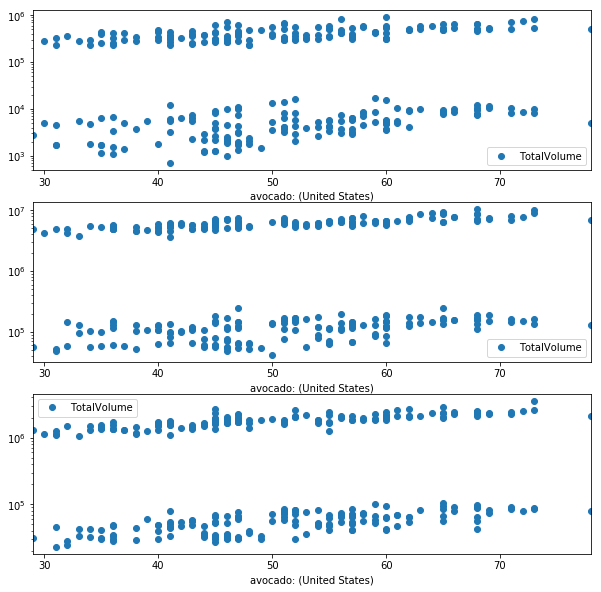

In [224]:
figure, axes = plt.subplots(3, 1)
df_train[df_train['region']==50].plot(x='avocado: (United States)', y='TotalVolume',logy=True, style='o',ax=axes[0],figsize=(10,10))
df_train[df_train['region']==45].plot(x='avocado: (United States)', y='TotalVolume',logy=True, style='o',ax=axes[1],figsize=(10,10))
df_train[df_train['region']==35].plot(x='avocado: (United States)', y='TotalVolume',logy=True, style='o',ax=axes[2],figsize=(10,10))

## Predicting the Total Volume with LASSO

In [231]:
scaler  = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)

model = Lasso(random_state=42, max_iter=10000)


alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(0.0001, 0.31622776601683794)

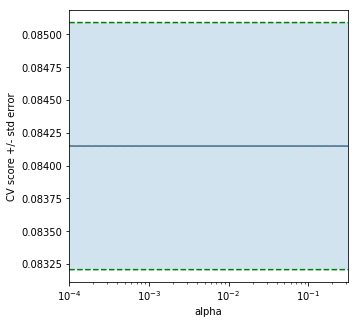

In [232]:
random_grid = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False)
random_grid.fit(X_train_s, y_train)
scores = random_grid.cv_results_['mean_test_score']
scores_std = random_grid.cv_results_['std_test_score']
plt.figure(figsize=(5,5))
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'g--')
plt.semilogx(alphas, scores - std_error, 'g--')

plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2) # alpha controls the fill color

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [233]:
model.fit(X_train_s,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [238]:
X_test_s = scaler.fit_transform(X_test)
pred = model.predict(X_test_s)

C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


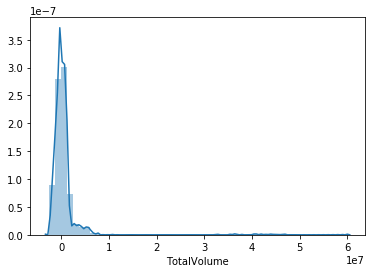

In [239]:
sns.distplot(y_test - pred,bins=50)

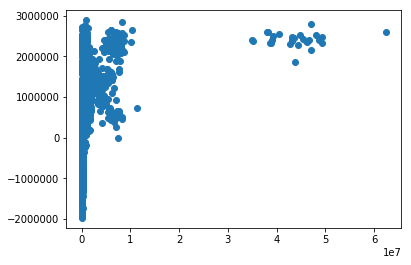

In [240]:
plt.scatter(y_test,pred)

In [242]:
r2_score(y_test,pred)

0.06585181443391674

The relationship between the features and the data is more complex than what a linear relation from Lasso or ridge regression can model. 

Lets try a tree based method instead.

## Predicting the Total Volume with Gradientboosting

In [243]:
n_estimators = [int(x) for x in np.linspace(start=10,stop=50,num=5)] # The number of trees in the forest
max_features = ['sqrt','log2'] # The number of features to consider when looking for the best split
max_depth    = [int(x) for x in np.linspace(start=5,stop=20,num=5)]
min_smp_splt = sorted(np.random.randint(2,10,5))
min_smp_leaf = sorted(np.random.randint(2,10,5))

random_grid  = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_smp_splt,
                'min_samples_leaf':min_smp_leaf
}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [4, 5, 7, 8, 9], 'min_samples_leaf': [2, 3, 5, 8, 8]}


In [244]:
model = GradientBoostingRegressor(learning_rate=0.1)
model_random = RandomizedSearchCV(estimator=model,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  n_iter=25,
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=2,
                                  random_state=42,
                                  return_train_score = True
)

In [245]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   26.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [4, 5, 7, 8, 9], 'min_samples_leaf': [2, 3, 5, 8, 8]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

In [246]:
pred = model_random.predict(X_test)

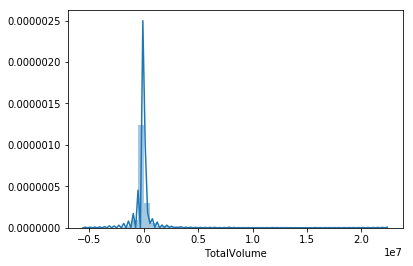

In [247]:
sns.distplot(y_test - pred)

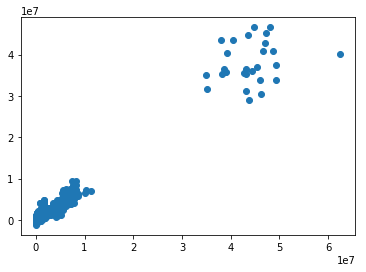

In [248]:
plt.scatter(y_test,pred)

In [249]:
r2_score(y_test,pred)

0.9496342645167817

# Average price prediction.

In [300]:
df_avg   = df_fill.copy()

# drop year column (this is because I have not done a real forecast- should be done to improve the analysis and model) 
df_avg.drop(df_avg.columns[[11]],axis=1,inplace=True)

X = df_avg.iloc[:,[0]+[int(x) for x in range(2,len(df_avg.iloc[0,:]))]] 
y = df_avg.iloc[:,1]

# in this case 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [301]:
X_train.head()

,Week,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region,avocado: (United States),organic: (United States),avocado recipe: (United States),avocado toast: (United States),avocado sandwich: (United States),organic avocado: (United States)
1190,12,808897.21,65158.96,524971.24,42381.39,176385.62,171699.95,4685.67,0.00,0,2,45,83,68,10,60,40
19460,22,3433759.97,1258719.38,441223.66,81658.52,1652158.41,1522359.55,59636.85,70162.01,0,22,66,83,92,49,69,50
3173,30,495344.27,279280.58,161574.35,16605.49,37883.85,36718.01,1165.84,0.00,0,41,45,72,78,9,48,21
23315,9,30318.84,121.35,4726.76,32.57,25438.16,24213.77,1224.39,0.00,1,44,64,85,72,62,55,62
18102,9,222950.32,6008.33,68134.36,0.00,147949.04,119193.36,28755.68,0.00,1,15,64,85,68,51,66,52


In [302]:
ex_model = ExtraTreesRegressor()

In [303]:
ex_model.fit(X_train,y_train)

C:\Users\thomas\Anaconda33\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

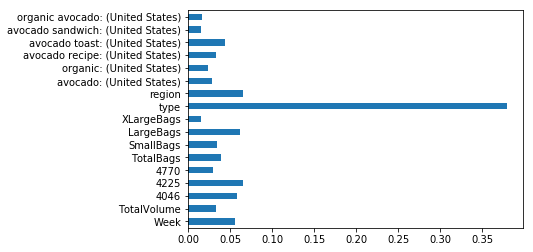

In [304]:
feature_imp = pd.Series(ex_model.feature_importances_,index=X_train.columns)
feature_imp.plot(kind='barh')
plt.show()

In [262]:
n_estimators = [int(x) for x in np.linspace(start=10,stop=50,num=5)] # The number of trees in the forest
max_features = ['auto','sqrt','log2'] # The number of features to consider when looking for the best split: More features seems to have importance here
max_depth    = [int(x) for x in np.linspace(start=5,stop=20,num=5)]
min_smp_splt = sorted(np.random.randint(2,10,5))
min_smp_leaf = sorted(np.random.randint(2,10,5))

random_grid  = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_smp_splt,
                'min_samples_leaf':min_smp_leaf
}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [2, 3, 6, 6, 8], 'min_samples_leaf': [3, 5, 6, 7, 9]}


In [263]:
model = GradientBoostingRegressor(learning_rate=0.1)
model_random = RandomizedSearchCV(estimator=model,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  n_iter=25,
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=2,
                                  random_state=42,
                                  return_train_score = True
)

In [264]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   40.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [2, 3, 6, 6, 8], 'min_samples_leaf': [3, 5, 6, 7, 9]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

In [265]:
pred = model_random.predict(X_test)

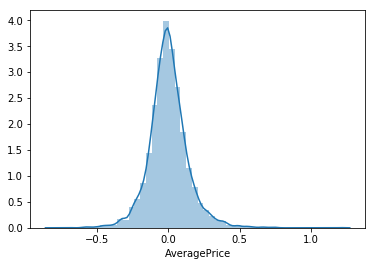

In [266]:
sns.distplot(y_test - pred)

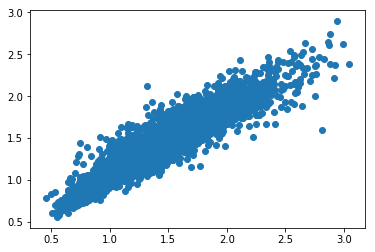

In [267]:
plt.scatter(y_test,pred)

In [268]:
r2_score(y_test,pred)

0.8645417750658624

## Lets try without the google search data, since this data is biased in my model.

In [273]:
df_avg   = df_fill.copy()
# drop year column (this is because I have not done a real forecast- should be done to improve the analysis and model) 
df_avg.drop(df_avg.columns[[11,13,14,15,16,17,18]],axis=1,inplace=True)

X = df_avg.iloc[:,[0]+[int(x) for x in range(2,len(df_avg.iloc[0,:]))]] 
y = df_avg.iloc[:,1]

# in this case 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [274]:
n_estimators = [int(x) for x in np.linspace(start=10,stop=50,num=5)] # The number of trees in the forest
max_features = ['auto','sqrt','log2'] # The number of features to consider when looking for the best split: More features seems to have importance here
max_depth    = [int(x) for x in np.linspace(start=5,stop=20,num=5)]
min_smp_splt = sorted(np.random.randint(2,10,5))
min_smp_leaf = sorted(np.random.randint(2,10,5))

random_grid  = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_smp_splt,
                'min_samples_leaf':min_smp_leaf
}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [5, 6, 7, 7, 9], 'min_samples_leaf': [2, 5, 7, 8, 9]}


In [275]:
model = GradientBoostingRegressor(learning_rate=0.1)
model_random = RandomizedSearchCV(estimator=model,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  n_iter=25,
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=2,
                                  random_state=42,
                                  return_train_score = True
)

In [276]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   29.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [5, 6, 7, 7, 9], 'min_samples_leaf': [2, 5, 7, 8, 9]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

In [278]:
pred = model_random.predict(X_test)

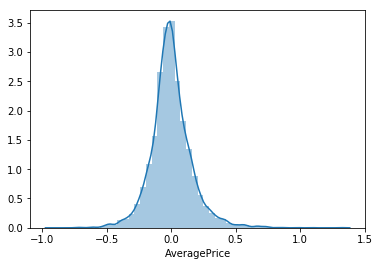

In [281]:
sns.distplot(y_test - pred)

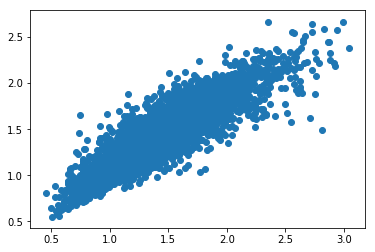

In [282]:
plt.scatter(y_test,pred)

In [280]:
r2_score(y_test,pred)

0.8165254775624442

## Lets try with the test  set as 2019 -as in the Total volume prediction

In [285]:
df_avg   = df_fill.copy()

# creating data for training
df_train = df_avg[df_avg['year']!=2019]
df_test  = df_avg[df_avg['year']==2019]

df_train.drop(df_train.columns[[11,13,14,15,16,17,18]],axis=1,inplace=True)
df_test.drop(df_test.columns[[11,13,14,15,16,17,18]],axis=1,inplace=True)

X_train = df_train.iloc[:,[0]+[int(x) for x in range(2,len(df_train.iloc[0,:]))]] 
y_train = df_train.iloc[:,1]

X_test = df_test.iloc[:,[0]+[int(x) for x in range(2,len(df_test.iloc[0,:]))]] 
y_test = df_test.iloc[:,1]

In [293]:
X_train.head()

,Week,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,1,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,0
1,1,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,1
3,1,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,0,3
4,1,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,0,4
5,1,116253.44,3267.97,55693.04,109.55,57182.88,57182.88,0.00,0.0,0,5


In [294]:
X_test.head()

,Week,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
22353,2,44749707.48,14377053.08,11890232.90,893721.10,17588700.40,12829493.40,4617813.55,141393.45,0,51
22354,2,129222.29,3789.30,112635.18,158.00,12639.81,8877.95,3761.86,0.00,0,0
22355,2,828971.15,388574.98,38902.85,3482.04,398011.28,299475.26,98477.41,58.61,0,1
22356,2,925391.38,102652.85,530128.43,8212.94,284397.16,263150.78,21233.05,13.33,0,2
22357,2,108261.98,43723.19,7085.86,14435.46,43017.47,23932.54,19049.95,34.98,0,3


In [286]:
n_estimators = [int(x) for x in np.linspace(start=10,stop=50,num=5)] # The number of trees in the forest
max_features = ['auto','sqrt','log2'] # The number of features to consider when looking for the best split: More features seems to have importance here
max_depth    = [int(x) for x in np.linspace(start=5,stop=20,num=5)]
min_smp_splt = sorted(np.random.randint(2,10,5))
min_smp_leaf = sorted(np.random.randint(2,10,5))

random_grid  = {'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_smp_splt,
                'min_samples_leaf':min_smp_leaf
}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [4, 5, 7, 8, 9], 'min_samples_leaf': [2, 3, 6, 6, 7]}


In [287]:
model = GradientBoostingRegressor(learning_rate=0.1)
model_random = RandomizedSearchCV(estimator=model,
                                  param_distributions=random_grid,
                                  scoring='neg_mean_squared_error',
                                  n_iter=25,
                                  n_jobs=-1,
                                  cv=5,
                                  verbose=2,
                                  random_state=42,
                                  return_train_score = True
)

In [288]:
model_random.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   48.1s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=25, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [4, 5, 7, 8, 9], 'min_samples_leaf': [2, 3, 6, 6, 7]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=2)

In [289]:
pred = model_random.predict(X_test)

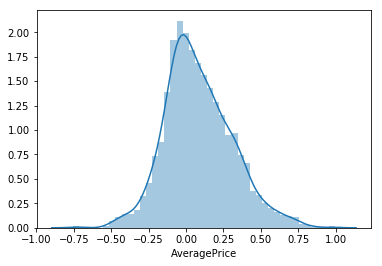

In [290]:
sns.distplot(y_test - pred)

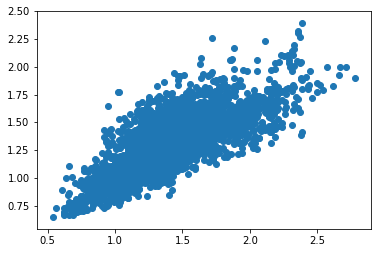

In [291]:
plt.scatter(y_test,pred)

In [292]:
r2_score(y_test,pred)

0.5456630460360364